
# **Análisis de Datos - Radiación Solar** #
________________________________________

# **OBJETIVO.**

Determinar si un conjunto de datos experimentales correspondientes a la irradiancia espectral solar, dados en términos de la longitud de onda de la radiación y medidos por diferentes dispositivos, se ajustan apropiadamente a la curva característica de la función definida por la radiancia espectral de un cuerpo negro en equilibrio térmico, usando criterios estadísticos como el coeficiente de determinación $R^2$.

# **Cuerpo negro: ley de Planck.**  Densidad espectral de energía y radiancia espectral.

* **DENSIDAD ESPECTRAL DE ENERGÍA.** Es una función universal que se define a partir de la ley de Planck y tiene dimensiones de energía por unidad de volumen. Corresponde a la energía emitida por un cuerpo negro en equilibrio térmico a una temperatura absoluta $T$ y puede escribirse en términos de la frecuencia $\nu$ (el número de ciclos o repeticiones de una onda por unidad de tiempo) o de la longitud de onda $\displaystyle \lambda = \frac{c}{\nu}$, de la siguiente manera:
$$u(\nu, T)\, d\nu = \frac{8\pi h\nu^3}{c^3}\frac{d\nu}{e^{\frac{h\nu}{k_BT}}-1};\;\;\;\;\;\; u(\lambda, T)\, d\lambda = -\frac{8\pi hc}{\lambda^5}\frac{d\lambda}{e^{\frac{hc}{\lambda k_BT}}-1}$$


> donde $k_{\text{B}} = 1.3806\times 10^{-23}\;\text{J}\cdot\text{K}^{-1}$, $h = 6.626\times 10^{-34}\;\text{J}\cdot\text{s}$ y $c = 2.998 \times 10^8\;\text{m}\cdot\text{s}^{-1}$, son respectivamente: la constante de Boltzmann, la constante de Planck y la velocidad de la luz en el vacío.

> A partir de la suma sobre todas las frecuencias o longitudes de onda, resulta la densidad de energía total:
$$U(T) = \int_0^{\infty} u(\nu, T)\, d\nu;\;\;\;\;\;\; U(T) = \int_{\infty}^0 u(\lambda, T)\, d\lambda $$

* **RADIANCIA ESPECTRAL.** Es la magnitud que se mide experimentalmente. Tiene dimensiones de energía por unidad de volumen y tiempo (esto es, potencia por unidad de volumen). Esta se obtiene multiplicando la función $u$, por un factor de $\displaystyle \frac{c}{4}$, por lo tanto:
$$r(\nu, T) = \frac{2\pi h\nu^3}{c^2}\frac{1}{e^{\frac{h\nu}{k_BT}}-1};\;\;\;\;\;\; r(\lambda, T) = -\frac{2\pi hc^2}{\lambda^5}\frac{1}{e^{\frac{hc}{\lambda k_BT}}-1}$$
Y ahora, la integración o suma sobre todo el rango de frecuencias o longitudes de onda, corresponde a la **Ley de Stefan-Boltzmann** (de donde se obtiene la intensidad de la energía emitida por un cuerpo negro), la cual tiene dimensiones de potencia por unidad de área:
$$R(T) = \frac{P}{A} =  \int_{\infty}^0 r(\lambda, T)\, d\lambda = \sigma T^4;\;\;\; \sigma = \frac{2\pi^5 k_{\text{B}}^4}{15 h^3 c^2} \approx 5.6704 \times 10^{-8} \;\text{W}\cdot \text{m}^{-2} \cdot \text{K}^{-4}$$

# **Ajuste de Datos:**

Para elaborar el ajuste se tomaron dos conjuntos de datos **[2]** de la irradiancia espectral solar, con medidas procesadas por dispositivos configurados mediante las magnitudes de, $\text{W}\cdot \text{m}^{-2}\cdot\text{nm}^{-1}$:

1.   **ASTM E-490.** Desarrollado en el año 2000 por la Sociedad Estadounidense de Pruebas y Materiales (American Society for Testing and Materials - ASTM), se basa en datos de satélites, misiones de transbordadores espaciales, aeronaves a gran altitud, sondeos de cohetes, telescopios solares terrestres e irradiancia espectral modelada. Los datos se encuentran disponibles en formato de excel (*.xls*), pero se manipularon de forma manual en un archivo de texto plano a dos columnas, la primera siendo la longitud de onda y la segunda la irradiancia espectral solar.

2.   **Synthetic/composite Extraterrestrial Spectrum.** Elaborado por Chris Gueymard en el año 2003, cubre la historia y el desarrollo de la mayoría de espectros extraterrestres, incluyendo fuentes recientes con una amplia región espectral. En este caso, los datos se manipularon usando **dataframes del módulo Pandas**.

Ambos se encuentran disponibles en:
* https://drive.google.com/file/d/1P11diGDjOtKJ9rfeOm_amBEH9uMJDzMI/ (1)
* https://www.nrel.gov/grid/solar-resource/assets/data/newguey2003.txt (2)


# **CRITERIOS ESTADISTICOS:** bondad del ajuste.

* Coeficiente de determinación:

$$R^2 = 1 - \frac{\mathbf{SS_{res}}}{\mathbf{SS_{tot}}}$$

> donde la suma residual y la suma total de cuadrados se definen a partir de los datos $X_E$ (experimental), $X_T$ (ajuste teórico) y $X_M$ (media experimental) **[3]**, como:


$$\mathbf{SS_{res}} = \sum_{i = 1}^N (X_E - X_T)^2; \;\;\;\;\;\; \mathbf{SS_{tot}} = \sum_{i = 1}^N (X_E - X_M)^2$$


* RMS - error cuadrático medio:

$$E = \sqrt{\frac{1}{N}\sum_{i = 1}^N(X_E - X_T)^2}$$



In [ ]:
#-------------------------------------------------------
# Librerías y módulos del entorno de programación
#-------------------------------------------------------

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive
from scipy.optimize import curve_fit

In [ ]:
#-------------------------------------------------------
# Lectura conjunto de datos (1), almacenados en texto
# plano y en una carpeta de Drive
#-------------------------------------------------------

drive.mount('/content/gdrive')
!cp '/content/gdrive/My Drive/Virtual/DatosGlobo2.txt' 'ref_1.txt'
!cp '/content/gdrive/My Drive/Virtual/DatosSatelite2.txt' 'ref_2.txt'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
with open('ref_1.txt') as f1, open('ref_2.txt') as f2:
  n1 = len(list(f1))
  n2 = len(list(f2))

In [ ]:
g = np.loadtxt('ref_1.txt', delimiter='\t')
s = np.loadtxt('ref_2.txt', delimiter='\t')

In [ ]:
#-------------------------------------------------------
# Asignacion de las columnas para conjunto de datos (1)
# Conversion de unidades de longitud de onda λ (nm → m)
#-------------------------------------------------------

w, B = g[:,0], g[:,1]
wave, b = w*1e-9, B*1e9

print(len(wave))

919


In [ ]:
#-------------------------------------------------------
# Lectura conjunto de datos (2), cargados directamente
# desde la URL donde se encuentran almacenados
#-------------------------------------------------------

dataset=pd.read_csv("https://www.nrel.gov/grid/solar-resource/assets/data/newguey2003.txt",
                    skiprows=9, header=None, delimiter="\t")

#-------------------------------------------------------
# Restricción cantidad datos, índice hasta λ = 8000 nm
#-------------------------------------------------------
print(dataset[dataset[0]==8000].index.values)
df = dataset.iloc[:2395]
#print(dataset)
#print(df)

#-------------------------------------------------------
# Arreglos (x, y) con conversión de unidades, nm → m
#-------------------------------------------------------
x = np.array(df[0])*1e-9
y = np.array(df[1])*1e9

[2394]


In [ ]:
#-------------------------------------------------------
# Valor de las constantes en unidades correspondientes
#-------------------------------------------------------
k = 1.381e-23   # J/K, Constante de Boltzmann
h = 6.626e-34   # J•s, Constante de Planck
c = 3.0e8       # m/s, Velocidad de la Luz
p = 2*np.pi*h*c**2 # Coeficiente función Planck

#-------------------------------------------------------
# Funciones que definen el modelo de Planck
#-------------------------------------------------------
def Planck(wave, T, A):
  return A*p/((wave**5)*(np.exp(h*c/(wave*k*T))-1))

def planck(x, T, A):
  return A*p/((x**5)*(np.exp(h*c/(x*k*T))-1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


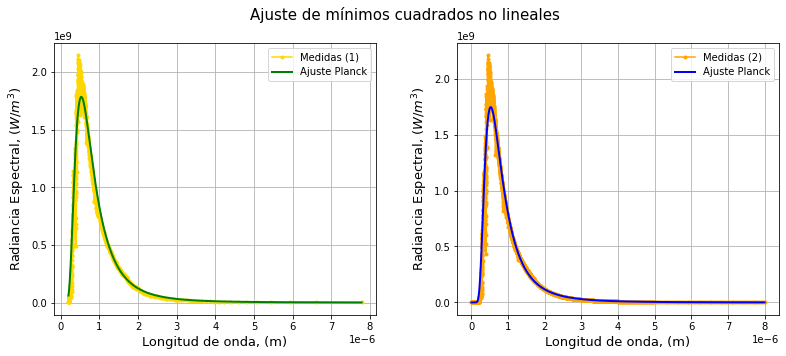

In [ ]:
#-------------------------------------------------------
# AJUSTES PARA LOS DOS CONJUNTOS DE DATOS
#-------------------------------------------------------
popt_1, pcov_1 = curve_fit(Planck, wave, b, p0=[5000, 1])
popt_2, pcov_2 = curve_fit(planck, x, y, p0=[5000, 1])

#-------------------------------------------------------
# Graficas conjuntos de datos y sus respectivos ajustes
#-------------------------------------------------------
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,5))
fig.suptitle('Ajuste de mínimos cuadrados no lineales', fontsize = 15)

ax1.plot(wave, b,  color = 'gold', marker = '.', label = "Medidas (1)")
ax1.plot(wave, Planck(wave, *popt_1), 'g-', linewidth=2, label="Ajuste Planck")
ax1.set_xlabel('Longitud de onda, (m)', fontsize = 13)
ax1.set_ylabel('Radiancia Espectral, ($W/m^3$)', fontsize = 13)
ax1.grid()
ax1.legend()

ax2.plot(x, y, color = 'orange', marker = '.', label = "Medidas (2)")
ax2.plot(x, planck(x, *popt_2), 'b-', linewidth=2, label="Ajuste Planck")
ax2.set_xlabel('Longitud de onda, (m)', fontsize = 13)
ax2.set_ylabel('Radiancia Espectral, ($W/m^3$)', fontsize = 13)
ax2.grid()
ax2.legend()

plt.subplots_adjust(wspace=0.25)
plt.show()

In [ ]:
#-------------------------------------------------------
# CRITERIOS ESTADISTICOS.
# Llamada a funciones: parámetros y media de los datos
#-------------------------------------------------------
b_1 = Planck(wave, *popt_1)
bmean = np.mean(b)

x_2 = planck(x, *popt_2)
xmean = np.mean(x)

#-------------------------------------------------------
# Suma residual y suma total de cuadrados
#-------------------------------------------------------
ss_res_1 = np.dot((b-b_1),(b-b_1))
ss_tot_1 = np.dot((b-bmean),(b-bmean))

ss_res_2 = np.dot((x-x_2),(x-x_2))
ss_tot_2 = np.dot((x-xmean),(x-xmean))

#-------------------------------------------------------
# Visualización de los criterios estadísticos
#-------------------------------------------------------
print("ESTADISTICOS AJUSTE PRIMER CONJUNTO DE DATOS.")
print("\nEl valor de los dos criterios es:")
print("R^2 =",  round(1-ss_res_1/ss_tot_1, 5))
print("E =", round(np.mean((b-b_1)**2), 5))

print("\nEl valor de la temperatura y su error es:")
print("T = (", popt_1[0], "+/-", pcov_1[0,0]**0.5, ") K")


print("\nESTADISTICOS AJUSTE SEGUNDO CONJUNTO DE DATOS.")
print("\nEl valor de los dos criterios es:")
print("R^2 =",  round(1-ss_res_2/ss_tot_2, 5))
print("E =", round(np.mean((x-x_2)**2), 5))

print("\nEl valor de la temperatura y su error es:")
print("T = (", popt_2[0], "+/-", pcov_2[0,0]**0.5, ") K")

ESTADISTICOS AJUSTE PRIMER CONJUNTO DE DATOS.

El valor de los dos criterios es:
R^2 = 0.95081
E = 2.238708880108806e+16

El valor de la temperatura y su error es:
T = ( 5449.692525913047 +/- 16.73983839697769 ) K

ESTADISTICOS AJUSTE SEGUNDO CONJUNTO DE DATOS.

El valor de los dos criterios es:
R^2 = -3.681664638880226e+29
E = 6.67098418528256e+17

El valor de la temperatura y su error es:
T = ( 5504.228738427286 +/- 9.898462502233755 ) K


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


# **CONCLUSIONES.**

*   Mientras el valor del coeficiente de determinación sea más cercano al valor uno, $R^2 \approx 1$, se puede tener un modelo eficiente y óptimo. El modelo correspondiente al primer conjunto de datos, es consistente con un valor de $R^2$ cercano a la unidad y de acuerdo con estre criterio, es el que representa el ajuste con mayor calidad. Sin embargo, se aclara que en muchos modelos no lineales el valor de $R^2$ no necesariamente representa un indicador de un buen ajuste.

*   El valor de la temperatura efectiva de la superficie del Sol es de $5778\,\text{K}$ **[**[☉](https://es.wikipedia.org/wiki/Sol)**]**. El parámetro más cercano a este valor, resultó siendo la temperatura correspondiente al segundo conjunto de datos, pero los modelos que no tienen buenas predicciones teóricas, pueden dar lugar a valores negativos de $R^2$, tal como ocurrió en el caso presentado.

*  Para realizar los ajustes se planteó el supuesto de una temperatura $T = 6000\,\text{K}$ (al interior de los argumentos de la función `curve_fit`). Los valores de la temperatura superficial del Sol, como parámetro obtenido para cada conjunto de datos, se han comparado con el valor teórico, de lo cual resultan errores relativos que se encuentran entre $5\%$ y $6\%$ respectivamente.

*   En ambos casos el error cuadrático medio $E$ tiene un valor muy alto, por lo que sería necesario aplicar otras herramientas estadísticas que permitan decidir si los ajustes se encuentran sesgados: subestimados o sobreestimados (en el ajuste de un modelo no lineal, es posible que resulte subestimada la incertidumbre de todos los parámetros).

# **REFERENCIAS.**

**[1]**  Johanson R. (2019). Numerical Python: Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib, (2nd Ed.). California, U.S.A.: Apress, Springer Nature.

**[2]**  National Renewable Energy Laboratory - NREL, (2021). "Solar Resourse Data & Tools: Solar Spectra", [en línea]. Disponible en: https://www.nrel.gov/grid/solar-resource/spectra.html. [2021, 08 de agosto].

**[3]** STACK OVERFLOW, (2021). "Getting the r-squared value using `curve_fit`", [en línea]. Disponible en: https://stackoverflow.com/questions/19189362/. [2021, 12 de octubre]

**[4]**  SciPy documentation, (2021). "*scipy.optimize.curve_fit*, Use non-linear least squares to fit a function, f, to data. Interfaz de ajuste para mínimos cuadrados no lineales", [en línea]. Disponible en: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html. [2021, 06 de octubre]

**[5]**   WIKIPEDIA, (2021). "Planck's law, Spectral Radiance & Sun", [en línea]. Disponibles en: https://es.wikipedia.org/. [2021, 11 de octubre]

**[6]** Prof. Vázques, J. C. (2021). "Curso de Fundamentación en Computación: Teoria del módulo PANDAS", [en línea]. Disponible en: https://colab.research.google.com/drive/12ZKYvepChYAzHq7KGBTzI5xyrYVIN86H. [2021, 10 de octubre]

**[7]**   Schultz, B., GITHUB, (2021). "University of Michigan: COBE + FIRAS CMB Spectrum, Jupyter Notebook", [en línea]. Disponible en: https://github.com/benjaminaschultz/phsc_lab5/. [2021, 12 de octubre]










